#### Data. Code. Chill.

## Credit Card Fraud Dataset
__Prepared by:__ Jocaz Entico, Bingbong Recto, Rey Tugade

### Imports

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Data Description
__Context__

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. <br><br>
__Content__

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. <br><br>
__Inspiration__

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification. <br><br>
__Acknowledgements__

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML

Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

### Loading data

In [2]:
df_creditcard = pd.read_csv('creditcard.csv')

In [3]:
df_creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
set(df_creditcard['Class'].values.ravel())

{0, 1}

In [5]:
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Population per class: 
        0
0  284315
1     492
1.25 * Proportion Chance Criterion: 124.568874643996%


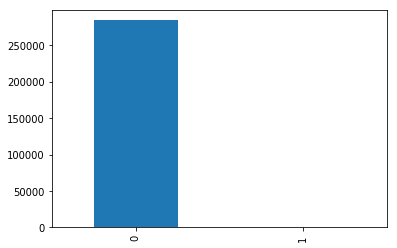

In [6]:
# from collections import Counter
state_counts = Counter(df_creditcard['Class'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar', legend=False)

num=(df_state[0]/df_state[0].sum())**2
print("Population per class: \n{}".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

In this dataset, we have __284,315__ non-fraudulent transactions and __492__ fraudulent transactions. We can observe the massive imbalance in occurence of two cases. For simplification, we will try to subsample the non-fraudulent transactions.

In [7]:
df_regular = df_creditcard[df_creditcard['Class'] == 0].sample(n=492)

In [8]:
df_fraud = df_creditcard[df_creditcard['Class'] == 1]

In [9]:
df_training = pd.concat([df_regular, df_fraud], axis=0)

Population per class: 
     0
0  492
1  492
1.25 * Proportion Chance Criterion: 62.5%


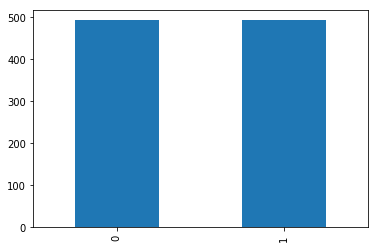

In [10]:
# from collections import Counter
state_counts = Counter(df_training['Class'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar', legend=False)

num=(df_state[0]/df_state[0].sum())**2
print("Population per class: \n{}".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

The minimum accuracy a classifier must have for the classification is __62.5%__ for it to be considered significant.

In [11]:
x = df_training.drop('Class', axis=1)
y = df_training['Class']

### Model Selection

In this notebook, we will be implemention k Nearest Neighbor Classification to predict fraudulent credit card transactions.

In [12]:
def reg_train(x, y, test_size, model, k_range, trials=100):
    total_training = pd.DataFrame()
    total_test = pd.DataFrame()
    for seedN in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(
            x, y, test_size=test_size, random_state=seedN)
        training_accuracy = []  
        test_accuracy = []
        
        for k in k_range:
#             instantiate model
            reg = model(k) 
#             train the model
            reg.fit(X_train, y_train) 
#             record training set accuracy  
            training_accuracy.append(reg.score(X_train, y_train))
#             record generalization accuracy    
            test_accuracy.append(reg.score(X_test, y_test)) 
        
        total_training[seedN]=training_accuracy
        total_test[seedN] = test_accuracy
    return total_training, total_test

### Defining Functions
We will be using namely reg_graph() to graph the mean training accuracy and test accuracy after _n_ trials of different random seeds.

In [13]:
def reg_graph(train, test, k_range, ylabel="R-squared", xlabel="n_neighbors"):
    fig = plt.figure(figsize=(15, 6))
    params = {'legend.fontsize': 15, 'legend.handlelength': 2}
    plot.rcParams.update(params)

    plt.errorbar(k_range, train.mean(axis=1),
                 yerr=train.std(axis=1), label="training accuracy", 
                 color='blue', marker='o', linestyle='dashed', markersize=15)
    plt.errorbar(k_range, test.mean(axis=1),
                 yerr=test.std(axis=1), label="test accuracy", 
                 color='red', marker='^', linestyle='-', markersize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.legend()

### Plot Results

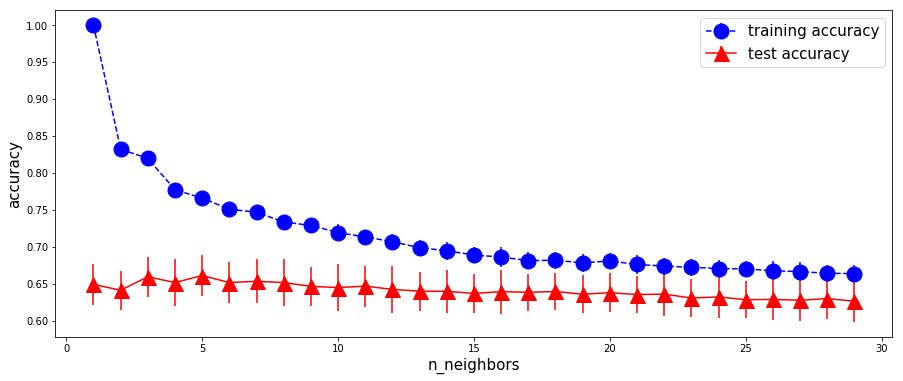

In [14]:
k_range = np.arange(1,30)
train, test = reg_train(x, y, 0.25, KNeighborsClassifier, 
                        k_range, 50)
reg_graph(train, test, k_range, ylabel='accuracy')

In [15]:
print('Max accuracy = %.3f at k = %d' % (test.mean(axis=1).values.max(),
      test.mean(axis=1).values.argmax()+1))

Max accuracy = 0.661 at k = 5


Using all the features, the optimal n_neighbor is __1__ with test accuracy of __66%__.

### Feature Selection

In [16]:
def feature_add(x, y, test_size, model, k_range, trials, top_features=[]):
    feature_accuracy = {}
    for i in x.drop(top_features, axis=1).columns:
        if len(top_features) == 0:
            reduced = x[i].values.reshape(-1, 1)
        else:
            reduced = x[[i, *top_features]]

        train, test = reg_train(reduced, y, test_size, KNeighborsClassifier, 
                        k_range, trials)
        baseline = test.mean(axis=1).values.max()
        k = test.mean(axis=1).values.argmax()+1
        feature_accuracy[i] = [k, baseline]
    return feature_accuracy

In [17]:
# incomplete
def feature_add_recursive(x, y, test_size, model, k_range, trials, rounds):
    curr_accuracy = 0
    top_features = []
    for i in np.arange(rounds):
        feature_accuracy = feature_add(x, y, test_size, 
                                       model, k_range, trials, top_features)
        features = list(feature_accuracy.keys())
        accuracy = [x[1] for x in feature_accuracy.values()]
        top_accuracy = np.max(accuracy)
        
        if top_accuracy <= curr_accuracy:
            break
        
        top_feature = features[np.argmax(accuracy)]
        top_features.append(top_feature)
        curr_accuracy = top_accuracy
        
        print(top_features)
        
    return top_features, top_accuracy

In [18]:
feature_add_recursive(x, y, 0.25, KNeighborsClassifier, k_range, 10, 3)

['V14']
['V14', 'V4']
['V14', 'V4', 'V23']


(['V14', 'V4', 'V23'], 0.9386178861788619)

After iterating through each features, we found out that this combination of features (__V14__, __V4__, and __V12__) will yield to a higher test accuracy than selecting all available features.

In [19]:
x_best = df_training[['V14', 'V4', 'V12']]

### Plot Results

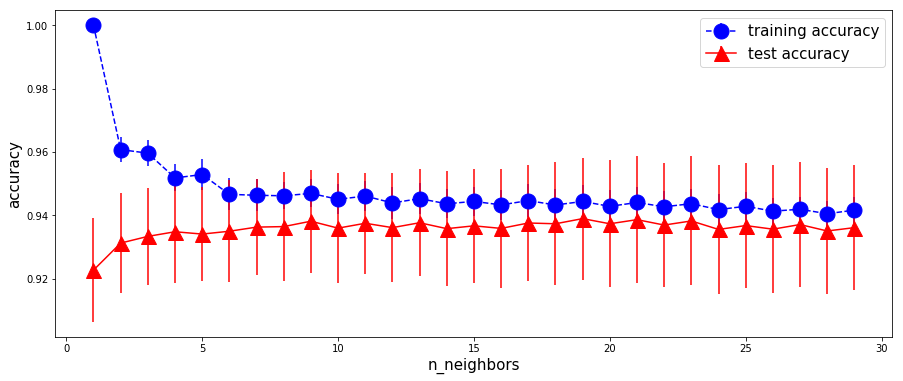

In [20]:
k_range = np.arange(1,30)
train, test = reg_train(x_best, y, 0.25, KNeighborsClassifier, 
                        k_range, 50)
reg_graph(train, test, k_range, ylabel='accuracy')

In [21]:
print('Max accuracy = %.3f at k = %d' % (test.mean(axis=1).values.max(),
      test.mean(axis=1).values.argmax()+1))

Max accuracy = 0.939 at k = 19


### Discussion
By iterating through each features, we decided to use the following features for the model: __V14__, __V4__, and __V12__. The optimal number of neighbors is __17__ with test accuracy of __93.5%__. This means that by using this model, the prediction for fraudulent credit card transactions will be __93.5%__ accurate.

### Testing the model on the full dataset

In [22]:
df_regular = df_creditcard[df_creditcard['Class'] == 0].sample(n=492)
df_fraud = df_creditcard[df_creditcard['Class'] == 1]
df_training = pd.concat([df_regular, df_fraud], axis=0)

In [23]:
df_remaining = \
df_creditcard[df_creditcard['Class'] == 0].drop(df_regular.index)

In [24]:
x = df_training.drop('Class', axis=1)
y = df_training['Class']

In [29]:
test_accuracy = []
trials = 10
for i in np.arange(trials):
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.5, random_state=i)
    X_test = pd.concat([X_test, df_remaining.drop('Class', axis=1)], axis=0)
    y_test = pd.concat([y_test, df_remaining['Class']], axis=0)
    
    reg = KNeighborsClassifier(17)
    reg.fit(X_train[['V14', 'V4', 'V12']], y_train)
    test_accuracy.append(reg.score(X_test[['V14', 'V4', 'V12']], y_test))

In [30]:
np.mean(test_accuracy)

0.9805286390095492

Testing the model on the whole dataset gives around **99.1%** accuracy. However, since the complete data contains only **0.17%** fraudulent transactions, majority of the **0.9%** error must be due to false positives.

### References
Credit Card Fraud Detection | Kaggle. (2018). Kaggle.com